 # Desafio

* Estimar quanto uma pessoa vai tirar na prova de matemática do enem.
* Métrica utilizada R² 





# Dataset.
- Foi disponibilizado dois bancos de dados pela Codenation, sendo que um deles é para ser utilizado como dados de treinamento e outro para teste.
- Nos dados de teste não foram oferecidos os dados do Target.
- Os dados para submeter no desafio são o ID dos alunos (número de inscrição) e as notas de matemática estimadas.





# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
#from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
#drive.mount('/content/drive')

# Importando os dados

In [2]:
df_train = pd.read_csv('testfiles/train.csv') # banco de treinamento
df_test  = pd.read_csv('testfiles/test.csv')  # banco de teste

### Conhecendo os datasets

In [3]:
# olhando a estrutura dos dados de treinamento
df_train.head(5)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
# olhando a estrutura dos dados de teste
df_test.head(5)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [5]:
print('Tamanho dos dados de treinamento', df_train.shape)
print('Tamanho dos dados de teste', df_test.shape)

Tamanho dos dados de treinamento (13730, 167)
Tamanho dos dados de teste (4576, 47)


Como há uma diferença entre o número de colunas nos dados de teste e treinamento, vou eliminar as colunas diferentes entre eles. Isso será feito porque não poderei usar estas variáveis para prever os dados de target.




In [6]:
# antes de eliminar as colunas diferentes dos bancos de dados vou separar os dados de target dos dados de treinamento

y =  df_train['NU_NOTA_MT'] # dados de target 

In [7]:
# Selecionando as colunas comuns dos bancos de dados

cont = []
for i in range(len(df_train.columns)):
    cont.append(np.sum(np.sum(df_test.columns == df_train.columns[i])))

In [8]:
# colunas comuns aos banco de dados 
df_train.columns[np.array(np.array(cont) == 1)]

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

Após conhecer quais variáveis presentes em ambos datasets, segue as descrição delas.
- NU_INSCRICAO : Número de inscrição do aluno.
- CO_UF_RESIDENCIA: Código da Unidade da Federação de residência.
- SG_UF_RESIDENCIA: Sigla da Unidade da Federação de residência.
- NU_IDADE: Idade da pessoa que vai fazer a prova.
- TP_SEXO: Sexo da pessoa que vai fazer a prova.
- TP_COR_RACA: Cor da pele da pessoa.
- TP_NACIONALIDADE: Nacionalidade da pessoa.
- TP_ST_CONCLUSAO: Situação da sua conclusão do ensino médio.
- TP_ANO_CONCLUIU: Ano de conclusão do ensino médio.
- TP_ESCOLA: Se a escola que a pessoa está é particular, pública ou exterior.
- TP_ENSINO: Qal escola concluiu o ensino médio
- IN_TREINEIRO: Se a pessoa está fazendo a prova para testar os seus conhecimentos.
- TP_DEPENDENCIA_ADM_ESC:  Se a escola que ele estuda ou estudou, é municipal, estadual ou federal.
- IN_BAIXA_VISAO: Pessoas com problemas de baixa visão.
- IN_CEGUEIRA: Se a pessoa é cega.
- IN_SURDEZ: Se a pessoa é surda.
- IN_DISLEXIA: Se a pessoa é disléxica.
- IN_DISCALCULIA: Se a pessoa tem DISCALCULIA
- IN_SABATISTA: Pessoas que não podem fazer no horário previsto por causa da religião.
- IN_GESTANTE:Se a pessoa ta gravida
- IN_IDOSO: Se a pessoa se qualifica como idosos.
- TP_PRESENCA_CN: Presença na prova objetiva de Ciências da Natureza.
- TP_PRESENCA_CH: Presença na prova objetiva de Ciências Humanas.
- TP_PRESENCA_LC: Presença na prova objetiva de Linguagens e Códigos
- CO_PROVA_CN: Código do tipo de prova de Ciências da Natureza
- CO_PROVA_CH: Código do tipo de prova de Ciências Humanas
- CO_PROVA_LC: Código do tipo de prova de Linguagens e Códigos
- CO_PROVA_MT: Código do tipo de prova de Matemática
- NU_NOTA_CN: Nota da prova de Ciências da Natureza
- NU_NOTA_CH: Nota da prova de Ciências Humanas
- NU_NOTA_LC: Nota da prova de Linguagens e Códigos
- TP_LINGUA: Qual língua estrangeiro foi fazer
- TP_STATUS_REDACAO: status da redação (se ela foi cancelada ou não e o motivo dela foi cancelada).
- NU_NOTA_COMP1: Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.
- NU_NOTA_COMP2: Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.
- NU_NOTA_COMP3: Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.
- NU_NOTA_COMP4:Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.
- NU_NOTA_COMP5:Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.
- NU_NOTA_REDACAO: Nota da prova de redação.
- Q001: Até que série seu pai, ou o homem responsável por você, estudou?
- Q002: Até que série sua mãe, ou a mulher responsável por você, estudou?
- Q006: Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
- Q024: Na sua residência tem computador?
- Q025: Na sua residência tem acesso à Internet?
- Q026: Você exerce ou já exerceu atividade remunerada?
- Q027: Com que idade você começou a exercer uma atividade remunerada?
- Q047: Em que tipo de escola você frequentou o Ensino Médio?
Após conhecer quais variáveis presentes em ambos datasets, segue as descrição delas.
- NU_INSCRICAO : Número de inscrição do aluno.
- CO_UF_RESIDENCIA: Código da Unidade da Federação de residência.
- SG_UF_RESIDENCIA: Sigla da Unidade da Federação de residência.
- NU_IDADE: Idade da pessoa que vai fazer a prova.
- TP_SEXO: Sexo da pessoa que vai fazer a prova.
- TP_COR_RACA: Cor da pele da pessoa.
- TP_NACIONALIDADE: Nacionalidade da pessoa.
- TP_ST_CONCLUSAO: Situação da sua conclusão do ensino médio.
- TP_ANO_CONCLUIU: Ano de conclusão do ensino médio.
- TP_ESCOLA: Se a escola que a pessoa está é particular, pública ou exterior.
- TP_ENSINO: Qal escola concluiu o ensino médio
- IN_TREINEIRO: Se a pessoa está fazendo a prova para testar os seus conhecimentos.
- TP_DEPENDENCIA_ADM_ESC:  Se a escola que ele estuda ou estudou, é municipal, estadual ou federal.
- IN_BAIXA_VISAO: Pessoas com problemas de baixa visão.
- IN_CEGUEIRA: Se a pessoa é cega.
- IN_SURDEZ: Se a pessoa é surda.
- IN_DISLEXIA: Se a pessoa é disléxica.
- IN_DISCALCULIA: Se a pessoa tem DISCALCULIA
- IN_SABATISTA: Pessoas que não podem fazer no horário previsto por causa da religião.
- IN_GESTANTE:Se a pessoa ta gravida
- IN_IDOSO: Se a pessoa se qualifica como idosos.
- TP_PRESENCA_CN: Presença na prova objetiva de Ciências da Natureza.
- TP_PRESENCA_CH: Presença na prova objetiva de Ciências Humanas.
- TP_PRESENCA_LC: Presença na prova objetiva de Linguagens e Códigos
- CO_PROVA_CN: Código do tipo de prova de Ciências da Natureza
- CO_PROVA_CH: Código do tipo de prova de Ciências Humanas
- CO_PROVA_LC: Código do tipo de prova de Linguagens e Códigos
- CO_PROVA_MT: Código do tipo de prova de Matemática
- NU_NOTA_CN: Nota da prova de Ciências da Natureza
- NU_NOTA_CH: Nota da prova de Ciências Humanas
- NU_NOTA_LC: Nota da prova de Linguagens e Códigos
- TP_LINGUA: Qual língua estrangeiro foi fazer
- TP_STATUS_REDACAO: status da redação (se ela foi cancelada ou não e o motivo dela foi cancelada).
- NU_NOTA_COMP1: Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.
- NU_NOTA_COMP2: Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.
- NU_NOTA_COMP3: Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.
- NU_NOTA_COMP4:Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.
- NU_NOTA_COMP5:Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.
- NU_NOTA_REDACAO: Nota da prova de redação.
- Q001: Até que série seu pai, ou o homem responsável por você, estudou?
- Q002: Até que série sua mãe, ou a mulher responsável por você, estudou?
- Q006: Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
- Q024: Na sua residência tem computador?
- Q025: Na sua residência tem acesso à Internet?
- Q026: Você exerce ou já exerceu atividade remunerada?
- Q027: Com que idade você começou a exercer uma atividade remunerada?
- Q047: Em que tipo de escola você frequentou o Ensino Médio?
 
 



 




Olhando as variáveis, a primeira hipótese para selecioná-las para criar um algoritmo de machine learning de regressão será no uso das variáveis preditoras que tenham a informação das notas das pessoas. Pois para passar na maioria das faculdades é o somatório da nota de todas as provas. Por causa disso, vou treinar os modelos de regressão com as notas das provas.


In [9]:
colunas           = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
df_treinamento_h1 = df_train[colunas]
df_teste_h1       = df_test[colunas] 

# Olhando os dados faltantes

In [10]:
print('Número de dados faltantes nas variáveis preditoras nos dados de treinamento')
print(df_treinamento_h1.isnull().sum(axis = 0))
print('NU_NOTA_MT (Dados de target) ',y.isnull().sum(axis = 0))
print('')
print('Número de dados faltantes nas variáveis preditoras nos dados de teste')
print(df_teste_h1.isnull().sum(axis = 0))

Número de dados faltantes nas variáveis preditoras nos dados de treinamento
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
dtype: int64
NU_NOTA_MT (Dados de target)  3597

Número de dados faltantes nas variáveis preditoras nos dados de teste
NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
dtype: int64


Antes de tomar uma decição de como vou prencher os dados faltantes vou ver se uma pessoa que falto alguma prova ele recebeu NaN.

In [11]:
col = ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
col1 = ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']

In [12]:
df_treinamento_f = df_train[col]
df_teste_f       = df_test[col1] 

In [13]:
df_treinamento_f.isnull().sum(axis = 0)

TP_PRESENCA_CN        0
TP_PRESENCA_CH        0
TP_PRESENCA_LC        0
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_MT         3597
NU_NOTA_REDACAO    3597
dtype: int64

In [14]:
df_teste_f.isnull().sum(axis = 0)

TP_PRESENCA_CN        0
TP_PRESENCA_CH        0
TP_PRESENCA_LC        0
NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
dtype: int64

Não há dados faltantes nas colunas que marcam a presença. Agora será verificado se uma pessoa que não veio a prova recebeu um NaN.
Mesmo não tendo a presença das pessoas que fizeram a prova de matemática, usei a presença da prova de línguas e códigos para ver se a pessoa não fez a prova de matemática, já que estas provas foram aplicadas no mesmo dia.
 
 
 



In [15]:
print('TP_PRESENCA_CN',np.sum(df_treinamento_f['NU_NOTA_CN'][df_treinamento_f['TP_PRESENCA_CN'] == 0].isnull() == 0))
print('TP_PRESENCA_CH',np.sum(df_treinamento_f['NU_NOTA_CH'][df_treinamento_f['TP_PRESENCA_CH'] == 0].isnull() == 0))
print('TP_PRESENCA_LC',np.sum(df_treinamento_f['NU_NOTA_LC'][df_treinamento_f['TP_PRESENCA_LC'] == 0].isnull() == 0))
print('TP_PRESENCA_LC',np.sum(df_treinamento_f['NU_NOTA_LC'][df_treinamento_f['TP_PRESENCA_LC'] == 0].isnull() == 0))
print('TP_PRESENCA_MT',np.sum(df_treinamento_f['NU_NOTA_MT'][df_treinamento_f['TP_PRESENCA_LC'] == 0].isnull() == 0))
print('TP_PRESENCA_R',np.sum(df_treinamento_f['NU_NOTA_REDACAO'][df_treinamento_f['TP_PRESENCA_LC'] == 0].isnull() == 0))

TP_PRESENCA_CN 0
TP_PRESENCA_CH 0
TP_PRESENCA_LC 0
TP_PRESENCA_LC 0
TP_PRESENCA_MT 0
TP_PRESENCA_R 0


In [16]:
print('TP_PRESENCA_CN',np.sum(df_teste_f['NU_NOTA_CN'][df_teste_f['TP_PRESENCA_CN'] == 0].isnull() == 0))
print('TP_PRESENCA_CH',np.sum(df_teste_f['NU_NOTA_CH'][df_teste_f['TP_PRESENCA_CH'] == 0].isnull() == 0))
print('TP_PRESENCA_LC',np.sum(df_teste_f['NU_NOTA_LC'][df_teste_f['TP_PRESENCA_LC'] == 0].isnull() == 0))
print('TP_PRESENCA_LC',np.sum(df_teste_f['NU_NOTA_LC'][df_teste_f['TP_PRESENCA_LC'] == 0].isnull() == 0))
print('TP_PRESENCA_R',np.sum(df_teste_f['NU_NOTA_REDACAO'][df_teste_f['TP_PRESENCA_LC'] == 0].isnull() == 0))

TP_PRESENCA_CN 0
TP_PRESENCA_CH 0
TP_PRESENCA_LC 0
TP_PRESENCA_LC 0
TP_PRESENCA_R 0


Como os dados faltantes representam as pessoas que não fizeram as provas, irei considerar estes dados com o valor de 0. 

In [17]:
df_treinamento_h1 = df_treinamento_h1.fillna(0) 
df_teste_f        = df_teste_f.fillna(0)
y                 = y.fillna(0)

In [18]:
df_treinamento_h1.isnull().sum(axis =0)

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

# Análise exploratória de dados

Antes de treinar os modelos de regressão, será visto a relação das variáveis preditoras com os dados de target pelo seus valores de correlação para fortalecer a hipótese levantada.
 
 
 
 



In [19]:
dados = pd.concat([y,df_treinamento_h1], axis =1)

In [20]:
corr = dados.corr()

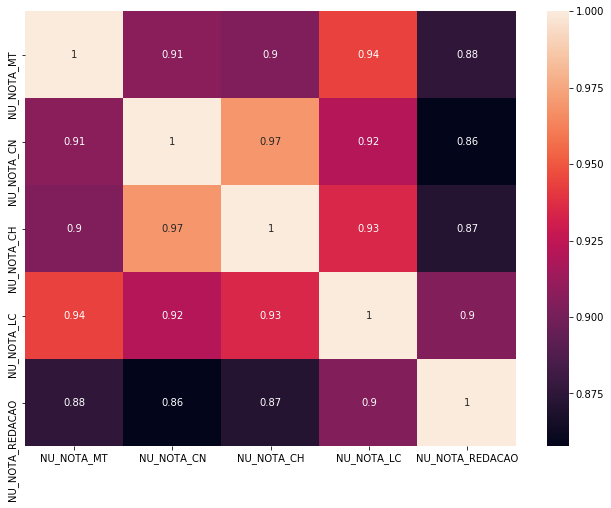

In [21]:
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

* Pelo os valores de correlação apresentados, mostra que a hipótese levantada de que se uma pessoa tirou uma nota bota em uma prova ele tirou também em outra. 


# Treinando os modelos de aprendizado de máquina
 



In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import sklearn.metrics as metrics
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
def modelo_resultado(Modelo,model,X,y,flag):
    scaler       = StandardScaler() 
    kf = KFold(n_splits=5) # selecionado 5 folds para realizar a validação cruzada
    vetor_R2  = np.zeros(5)
    vetor_MSE = np.zeros(5)
    vetor_RMSE = np.zeros(5) 
    vetor_b = np.zeros(5) 
    i = 0
    for linhas_treino, linhas_valid in kf.split(X):
      
        X_t, X_v = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_t, y_v = y[linhas_treino], y[linhas_valid]
    
        if flag == 1: # normaliza os dados
          # como todos os classificadores são baseados em distância, vou normalizar os dados 
            X_t     = scaler.fit_transform(X_t) # dados de treinamento normalizado
            X_v     = scaler.fit_transform(X_v) #
        md                    = model.fit(X_t, y_t)
        y_pred                = md.predict(X_v)
        vetor_R2[i]           = md.score(X_v,y_v)
        vetor_MSE[i]          = mean_squared_error(y_v, y_pred)
        #vetor_RMSE[i]         = mean_squared_error(y_v, y_pred,squared = False)

        i = i + 1
      
    
    print(Modelo)
    print('R^2  = ',('Média',vetor_R2.mean(),  'std',vetor_R2.std(), 'erro',vetor_R2.std()/np.sqrt(5)))
    print('MSE  = ',('Média',vetor_MSE.mean(), ' std',vetor_MSE.std(),'erro',vetor_MSE.std()/np.sqrt(5)))
   # print('RMSE = ' ,('Média',vetor_RMSE.mean(),'std',vetor_RMSE.std(),'erro',vetor_RMSE.std()/np.sqrt(5)))

    media = [vetor_R2.mean(),vetor_MSE.mean(),vetor_RMSE.mean()]
    std   = [vetor_R2.std(),vetor_MSE.std(),vetor_RMSE.std()]
    erro   = [vetor_R2.std()/np.sqrt(5),vetor_MSE.std()/np.sqrt(5),vetor_RMSE.std()/np.sqrt(5)]
  
    return media,std,erro

In [24]:
mediaL_h1,stdL_h1,erroL_h1 = modelo_resultado('Regressão Linear',LinearRegression(),df_treinamento_h1,y,flag = 0)
print('dados normalizados')
mediaL_h1N,stdL_h1N,erroL_h1N = modelo_resultado('Regressão Linear',LinearRegression(),df_treinamento_h1,y,flag = 1)

Regressão Linear
R^2  =  ('Média', 0.9025009893029038, 'std', 0.003309893103855748, 'erro', 0.0014802291956958447)
MSE  =  ('Média', 5100.534817695312, ' std', 131.88803123537315, 'erro', 58.98212065218198)
dados normalizados
Regressão Linear
R^2  =  ('Média', 0.9016245209300742, 'std', 0.0028398149399257704, 'erro', 0.0012700038498387007)
MSE  =  ('Média', 5146.747946904907, ' std', 112.95314855010005, 'erro', 50.514183686131105)


In [25]:
mediaK_h1,stdK_h1,erroK_h1  = modelo_resultado('KNN',KNeighborsRegressor(),df_treinamento_h1,y,flag = 0)
print('dados normalizados')
mediaK_h1N,stdK_h1N,erroK_h1N = modelo_resultado('KNN',KNeighborsRegressor(),df_treinamento_h1,y,flag = 1)

KNN
R^2  =  ('Média', 0.907812405382806, 'std', 0.0034644315506007235, 'erro', 0.001549340890107644)
MSE  =  ('Média', 4821.331400757465, ' std', 92.08106217059736, 'erro', 41.179902890768005)
dados normalizados
KNN
R^2  =  ('Média', 0.907713930884389, 'std', 0.0041501791117960225, 'erro', 0.001856016522555121)
MSE  =  ('Média', 4825.873716882738, ' std', 130.74071851268647, 'erro', 58.469026804306424)


In [26]:
mediaG_h1,stdG_h1,erroG_h1    = modelo_resultado('Gradient Boosting',GradientBoostingRegressor(),df_treinamento_h1,y,flag = 0)
print('dados normalizados')
mediaG_h1N,stdG_h1N,erroG_h1N = modelo_resultado('Gradient Boosting',GradientBoostingRegressor(),df_treinamento_h1,y,flag = 1)

Gradient Boosting
R^2  =  ('Média', 0.9218471003385108, 'std', 0.0032828577409682092, 'erro', 0.0014681386138532624)
MSE  =  ('Média', 4087.4060490923125, ' std', 112.3429368150096, 'erro', 50.241288702065034)
dados normalizados
Gradient Boosting
R^2  =  ('Média', 0.9217756052862363, 'std', 0.003506256623679166, 'erro', 0.0015680456314211028)
MSE  =  ('Média', 4090.8486377452937, ' std', 120.28275109289653, 'erro', 53.79208159288075)


In [27]:
mediaF_h1,stdF_h1,erroF_h1  = modelo_resultado('Floresta aleatória',RandomForestRegressor(),df_treinamento_h1,y,flag = 0)
print('dados normalizados')
mediaF_h1N,stdF_h1N,erroF_h1N  = modelo_resultado('Floresta aleatória',RandomForestRegressor(),df_treinamento_h1,y,flag = 1)

Floresta aleatória
R^2  =  ('Média', 0.9070878761723504, 'std', 0.00386218937252565, 'erro', 0.0017272235957889223)
MSE  =  ('Média', 4858.845332789513, ' std', 112.49238236312114, 'erro', 50.30812278296746)
dados normalizados
Floresta aleatória
R^2  =  ('Média', 0.9080535965438722, 'std', 0.003383071559990237, 'erro', 0.0015129555961768855)
MSE  =  ('Média', 4808.743971551348, ' std', 85.50270574885018, 'erro', 38.23797246291821)


Pelos resultados apresentados a normalização dos dados não ta conseguindo ter uma melhorar nos dados

# Outro teste que será feito será na adicião das notas que são referentes a cada tópico da nota de redeção.

- Obs: antes irei ver se existe dados faltantes nesta colunas

In [28]:
col = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']

In [29]:
df_treinamento_h2=df_train[col]
df_teste_h2=df_test[col]

In [30]:
print('Número de dados faltantes nas variáveis preditoras nos dados de treinamento')
print(df_treinamento_h2.isnull().sum(axis = 0))

print('')
print('Número de dados faltantes nas variáveis preditoras nos dados de teste')
print(df_teste_h2.isnull().sum(axis = 0))

Número de dados faltantes nas variáveis preditoras nos dados de treinamento
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

Número de dados faltantes nas variáveis preditoras nos dados de teste
NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
dtype: int64


Como existem dados faltantes nas novas variáveis, e elas têm o mesmo tamanho do que a nota de redação, vou levar em consideração que elas ocupam a mesma posição de dados faltantes das notas de redação. E estes dados serão preenchidos com 0.
 




In [31]:
df_treinamento_h2  = df_treinamento_h2.fillna(0) 
df_teste_h2        = df_teste_h2.fillna(0)
#y                  = y.fillna(0)

# Vendo se o resultado melhora 

In [32]:
modelo_resultado('Gradient Boosting',GradientBoostingRegressor(),df_treinamento_h2,y,flag = 0)
print('')
print('Normaliza os dados')
modelo_resultado('Gradient Boosting',GradientBoostingRegressor(),df_treinamento_h2,y,flag = 1)
#print('dados normalizados')
#modelo_resultado('Gradient Boosting',GradientBoostingRegressor(),df_treinamento_h1,y,flag = 1)

Gradient Boosting
R^2  =  ('Média', 0.9218648670074794, 'std', 0.003420064000040032, 'erro', 0.0015294991182978708)
MSE  =  ('Média', 4086.373794629521, ' std', 119.69066254508073, 'erro', 53.5272915445577)

Normaliza os dados
Gradient Boosting
R^2  =  ('Média', 0.9219207404949546, 'std', 0.0036223454720851656, 'erro', 0.0016199621427141994)
MSE  =  ('Média', 4083.0514046378726, ' std', 123.27167575169368, 'erro', 55.12876933621991)


([0.9219207404949546, 4083.0514046378726, 0.0],
 [0.0036223454720851656, 123.27167575169368, 0.0],
 [0.0016199621427141994, 55.12876933621991, 0.0])

# Tentativas para melhorar os resultados com criação de váriaveis.



In [33]:
df_treinamento_h3 = df_treinamento_h1

In [34]:
df_treinamento_h3['media notas'] = np.mean(df_treinamento_h3, axis = 1)
df_treinamento_h3['soma  notas'] = np.sum(df_treinamento_h3, axis = 1)
#df_treinamento_h1['std   notas'] = np.std(df_treinamento_h1, axis = 1)



In [35]:
mediaL_h3,stdL_h3,erroL_h3 = modelo_resultado('Regressão Linear',LinearRegression(),df_treinamento_h3,y,flag = 0)
print('dados normalizados')
mediaL_h3N,stdL_h3N,erroL_h3N = modelo_resultado('Regressão Linear',LinearRegression(),df_treinamento_h3,y,flag = 1)

Regressão Linear
R^2  =  ('Média', 0.9024883491001784, 'std', 0.0033449561784514832, 'erro', 0.0014959098793550867)
MSE  =  ('Média', 5101.15373855678, ' std', 132.7400565163062, 'erro', 59.36315794152491)
dados normalizados
Regressão Linear
R^2  =  ('Média', -1.0797165719817654e+19, 'std', 2.121094658528352e+19, 'erro', 9.485823686362198e+18)
MSE  =  ('Média', 5.8947443902263606e+23, ' std', 1.1589279195703789e+24, 'erro', 5.182883218363552e+23)


In [36]:
mediaK_h3,stdK_h3,erroK_h3  = modelo_resultado('KNN',KNeighborsRegressor(),df_treinamento_h3,y,flag = 0)
print('dados normalizados')
mediaK_h3N,stdK_h3N,erroK_h3N = modelo_resultado('KNN',KNeighborsRegressor(),df_treinamento_h3,y,flag = 1)

KNN
R^2  =  ('Média', 0.9063414887248795, 'std', 0.004790789111210767, 'erro', 0.002142506023706615)
MSE  =  ('Média', 4897.348441718864, ' std', 169.26906850130538, 'erro', 75.69942873139745)
dados normalizados
KNN
R^2  =  ('Média', 0.9071594365066227, 'std', 0.003920431392727944, 'erro', 0.0017532702190527715)
MSE  =  ('Média', 4855.012542840495, ' std', 114.11998443356595, 'erro', 51.036008556934256)


In [37]:
mediaG_h3,stdG_h3,erroG_h3    = modelo_resultado('Gradient Boosting',GradientBoostingRegressor(),df_treinamento_h3,y,flag = 0)
print('')
mediaG_h3L,stdG_h3L,erroG_h3L = modelo_resultado('Gradient Boosting',GradientBoostingRegressor(),df_treinamento_h3,y,flag = 1)

Gradient Boosting
R^2  =  ('Média', 0.9219382152876218, 'std', 0.0035628814628211477, 'erro', 0.001593369029328395)
MSE  =  ('Média', 4082.346518148498, ' std', 124.89257988030019, 'erro', 55.85365969953475)

Gradient Boosting
R^2  =  ('Média', 0.9218495508776036, 'std', 0.0036167469983290875, 'erro', 0.0016174584291364315)
MSE  =  ('Média', 4086.768126216854, ' std', 122.26901406646813, 'erro', 54.68036539890014)


In [38]:
mediaF_h3,stdF_h3,erroF_h3  = modelo_resultado('Floresta aleatoria',RandomForestRegressor(),df_treinamento_h3,y,flag = 0)
print('dados normalizados')
mediaF_h3N,stdF_h3N,erroF_h3N  = modelo_resultado('Floresta aleatoria',RandomForestRegressor(),df_treinamento_h3,y,flag = 1)

Floresta aleatoria
R^2  =  ('Média', 0.9093894976497212, 'std', 0.004320412667019177, 'erro', 0.0019321472828612086)
MSE  =  ('Média', 4737.763632964312, ' std', 132.2833718432788, 'erro', 59.1589223468906)
dados normalizados
Floresta aleatoria
R^2  =  ('Média', 0.9084506985346762, 'std', 0.005352918331582851, 'erro', 0.002393897853484803)
MSE  =  ('Média', 4786.700212381646, ' std', 204.34337583638927, 'erro', 91.38513582439087)


Pelos resultados apresentados vou usar turnar os parâmetros dos dados da hipose 1

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
def result(model,df_treinamento_h1,y,parameters):
    gd         = GridSearchCV(estimator=model,param_grid=parameters, cv = 5)
    gd_s       = gd.fit(df_treinamento_h1, y)

    return gd_s

In [41]:
# knn
parameters = {'n_neighbors':np.arange(5,55,5)}
model      = KNeighborsRegressor()
gd_K       = result(model,df_treinamento_h1,y,parameters)

In [42]:
# Gradient Boosting
parameters = {'learning_rate': [0.01,0.03,0.05,0.07,0.1,0.3,0.5,0.7],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [10,50,100,500],
               'max_depth'   : [4,6,8,10]}

model = GradientBoostingRegressor()
gd_GB = result(model,df_treinamento_h1,y,parameters)

In [43]:
parameters = {'n_estimators': [10,50,100,500],
                'max_depth': [4,6,8,10],
                'min_samples_split': np.arange(2,5),
                'min_samples_leaf': np.arange(1,4)}

model = RandomForestRegressor()
gd_RF = result(model,df_treinamento_h1,y,parameters)

# Melhores hiper parametros de cada classificador

In [44]:
print('Floresta Aleatória')
gd_RF.best_estimator_
print('Resultado:', gd_RF.best_score_)

Floresta Aleatória
Resultado: 0.9221941511591462


In [45]:
print('KNN')
gd_K.best_estimator_
print('Resultado:', gd_K.best_score_)

KNN
Resultado: 0.918143762001609


In [50]:
print('GB')
gd_GB.best_estimator_
print('Resultado:', gd_GB.best_score_)

GB
Resultado: 0.9224899620084044


Como o melhor resultado obtido foi pelo  Gradient Boosting, vou utilizar ele para o desafio.

In [61]:
df_treinamento_h1

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media notas,soma notas,std notas
0,436.3,495.4,581.2,520.0,508.225,2541.125,758.804289
1,474.5,544.1,599.0,580.0,549.400,2747.000,819.915926
2,0.0,0.0,0.0,0.0,0.000,0.000,0.000000
3,0.0,0.0,0.0,0.0,0.000,0.000,0.000000
4,0.0,0.0,0.0,0.0,0.000,0.000,0.000000
5,439.7,583.2,410.9,620.0,513.450,2567.250,768.900972
6,420.1,604.2,484.5,560.0,517.200,2586.000,773.143986
7,619.6,625.8,611.2,620.0,619.150,3095.750,922.984108
8,500.5,555.2,521.8,680.0,564.375,2821.875,843.234630
9,0.0,0.0,0.0,0.0,0.000,0.000,0.000000


In [50]:
md                    = model.fit(df_treinamento_h1, y)
y_pred                = md.predict(df_teste_h1)

ValueError: Number of features of the model must match the input. Model n_features is 6 and input n_features is 4 

In [ ]:
df_teste_h1.head()

In [ ]:
gd.best_score_

In [ ]:
gd.cv_results_ ['split0_test_score']

In [ ]:
gd.cv_results_

In [ ]:
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': np.arange(5,55,5)})

In [ ]:
modelo = []

In [ ]:
modelo.append(['Regressão Linear  ',LinearRegression()])
modelo.append(['KNN               ',KNeighborsRegressor()])
modelo.append(['Gradient Boosting ',GradientBoostingRegressor()])
modelo.append(['Passive Aggressive',PassiveAggressiveRegressor(max_iter=10000)])
modelo.append(['Floresta aleatoria',RandomForestRegressor()])

In [ ]:
validaPerformanceModelos(modelo, df_treinamento_h1, y)

In [ ]:
X